In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv(r"C:\Osman's Folder\Osman Nayeem\Data Analytics Project\hulu_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [5]:
df.describe()

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


In [6]:
df.dropna(subset='duration', inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
5,s6,TV Show,The Halloween Candy Magic Pet,NaN,NaN,NaN,"October 22, 2021",2021,NaN,1 Season,"Family, Kids",Join Mila and Morphle on a mystery-filled Hall...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [7]:
df.drop('director', axis=1, inplace=True)
df.drop('cast', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 1 to 3072
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2594 non-null   object
 1   type          2594 non-null   object
 2   title         2594 non-null   object
 3   country       1321 non-null   object
 4   date_added    2566 non-null   object
 5   release_year  2594 non-null   int64 
 6   rating        2180 non-null   object
 7   duration      2594 non-null   object
 8   listed_in     2594 non-null   object
 9   description   2593 non-null   object
dtypes: int64(1), object(9)
memory usage: 222.9+ KB


In [8]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Silent Night,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
5,s6,TV Show,The Halloween Candy Magic Pet,NaN,"October 22, 2021",2021,NaN,1 Season,"Family, Kids",Join Mila and Morphle on a mystery-filled Hall...


In [9]:
# Convert the "duration" column to string type
df['duration'] = df['duration'].astype(str)

# Now split the string and convert to numeric
df['duration'] = df['duration'].str.split(' ').str[0]
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Silent Night,NaN,"October 23, 2021",2020,NaN,94,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,"October 23, 2021",2021,PG-13,108,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,"October 22, 2021",2021,R,97,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,"October 22, 2021",2021,NaN,104,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
5,s6,TV Show,The Halloween Candy Magic Pet,NaN,"October 22, 2021",2021,NaN,1,"Family, Kids",Join Mila and Morphle on a mystery-filled Hall...
...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,United States,NaN,1966,TV-PG,3,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,United States,NaN,1997,TV-PG,7,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,United Kingdom,NaN,2011,TV-14,1,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,United States,NaN,1959,TV-PG,5,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate covariance
covariance = numeric_df.cov()
print("Covariance:\n", covariance)

# Calculate correlation
correlation = numeric_df.corr()
print("\nCorrelation:\n", correlation)

Covariance:
               release_year     duration
release_year     115.97561   -44.334490
duration         -44.33449  2347.931842

Correlation:
               release_year  duration
release_year       1.00000  -0.08496
duration          -0.08496   1.00000


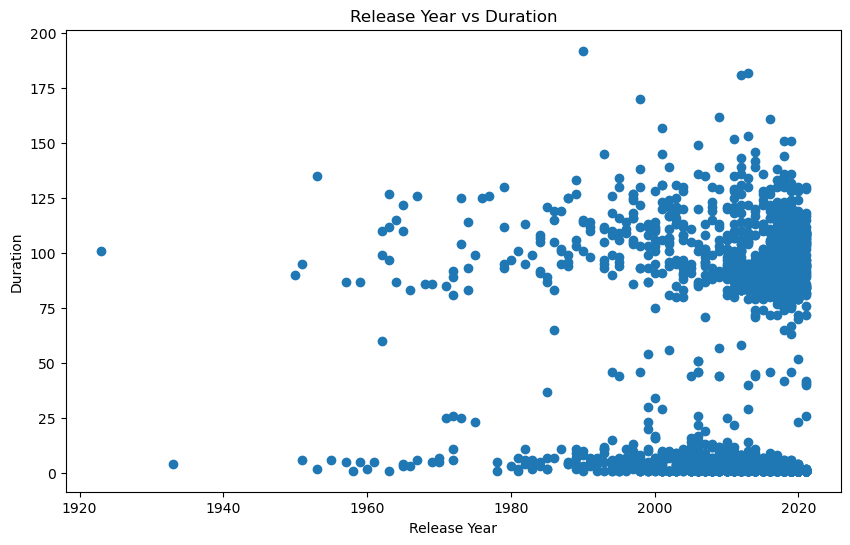

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['duration'])
plt.title('Release Year vs Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.show()

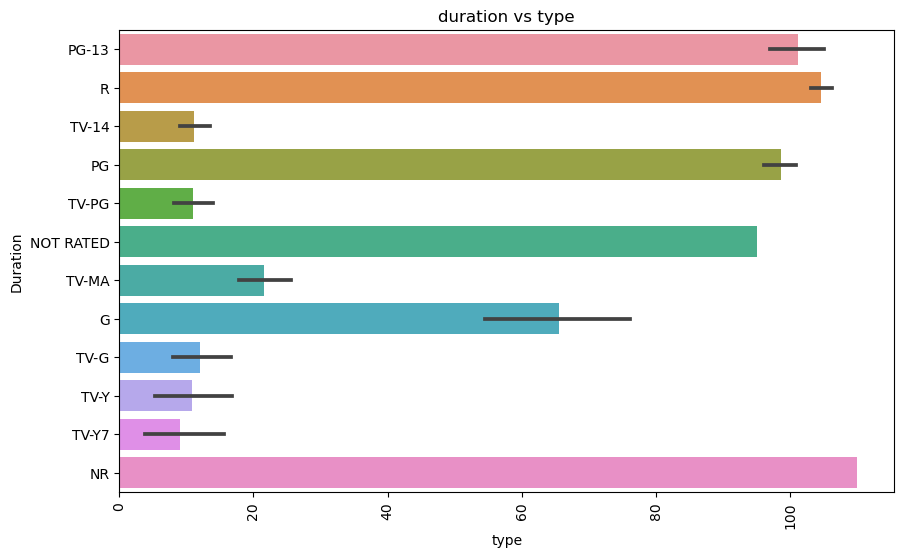

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='duration', y='rating', data=df)
plt.title('duration vs rating')
plt.xlabel('rating')
plt.ylabel('Duration')
plt.xticks(rotation=90)  
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 1 to 3072
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2594 non-null   object
 1   type          2594 non-null   object
 2   title         2594 non-null   object
 3   country       1321 non-null   object
 4   date_added    2566 non-null   object
 5   release_year  2594 non-null   int64 
 6   rating        2180 non-null   object
 7   duration      2594 non-null   int64 
 8   listed_in     2594 non-null   object
 9   description   2593 non-null   object
dtypes: int64(2), object(8)
memory usage: 222.9+ KB


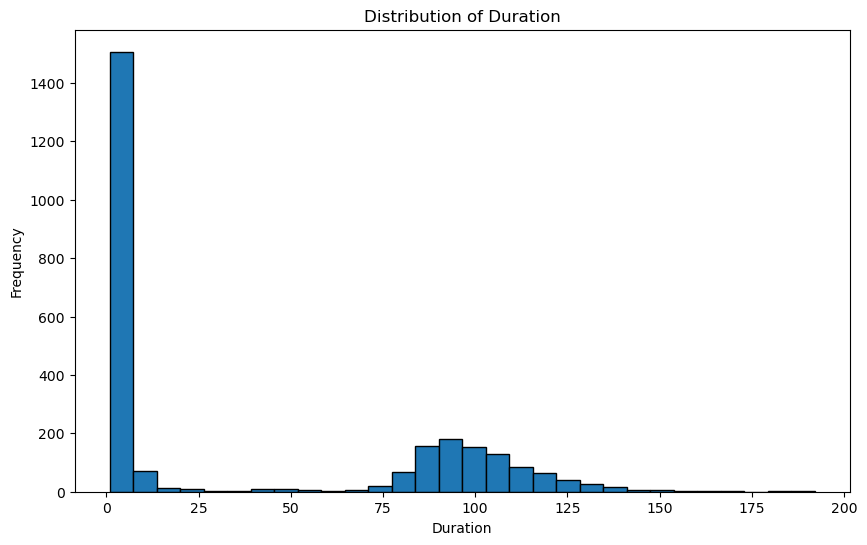

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.to_csv(r"C:\Osman's Folder\Osman Nayeem\Data Analytics Project\hulucleandata.csv")